Load dataset

In [2]:
import pandas as pd

df = pd.read_csv("CW1_train.csv")

Display basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  float64
 21  a6       1000

Show the first few rows

In [4]:
df.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


Check for missing values

In [5]:
df.isnull().sum()

outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64

Check for duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Summary statistics of numerical features

In [7]:
df.describe()

,outcome,carat,depth,table,price,x,y,z,a1,a2,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.979081,0.798407,61.748060,57.467360,3910.841900,5.733974,5.741665,3.540757,0.502349,0.507509,...,-0.011806,-0.009992,-0.021856,-0.009286,-0.012731,-0.007407,-0.002919,-0.015392,0.000051,-0.008890
std,12.722224,0.472046,1.429631,2.247036,3940.369616,1.114850,1.228057,0.692502,0.291012,0.291207,...,0.999700,1.000633,1.010847,1.010200,1.003570,0.997181,0.992112,0.991442,1.005808,1.005258
min,-44.879471,0.200000,50.800000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000128,0.000101,...,-3.750688,-3.701252,-3.810713,-3.549324,-3.532430,-3.740254,-3.987845,-4.244733,-3.649063,-3.862407
25%,-13.989962,0.400000,61.000000,56.000000,965.000000,4.730000,4.740000,2.920000,0.249922,0.251350,...,-0.672814,-0.697088,-0.696779,-0.674015,-0.681433,-0.687482,-0.666360,-0.678384,-0.667726,-0.680576
50%,-5.442794,0.710000,61.900000,57.000000,2441.000000,5.700000,5.720000,3.530000,0.502063,0.510046,...,-0.013058,0.000265,-0.005496,-0.010254,-0.017385,0.001915,0.022894,-0.009743,-0.010082,-0.016215
75%,3.918593,1.040000,62.500000,59.000000,5226.000000,6.530000,6.530000,4.030000,0.753191,0.764731,...,0.640883,0.673117,0.645305,0.669159,0.671203,0.659154,0.654947,0.653020,0.684738,0.656871
max,39.675966,4.000000,70.500000,73.000000,18791.000000,10.010000,58.900000,8.060000,0.999789,0.999976,...,3.601364,3.593209,4.243395,3.714985,4.135685,4.012513,3.812652,3.996531,3.808169,3.471238


Create box plots for all numerical columns to identify outliers

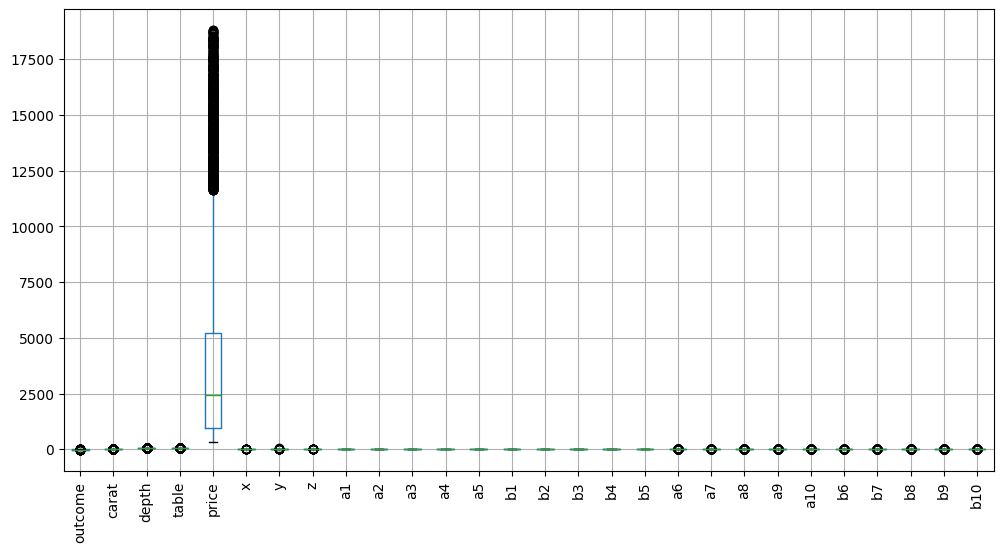

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

Replotting the boxplot with normalisation:

1. Apply log1p (ln(1+x)) transformation on all numerical features

In [9]:
import numpy as np

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

df_scaled = df.copy()
df_scaled[numerical_features] = np.log1p(df_scaled[numerical_features])

/home/mateo/ML-coursework1-k23080165/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


2. Re-plot the boxplot

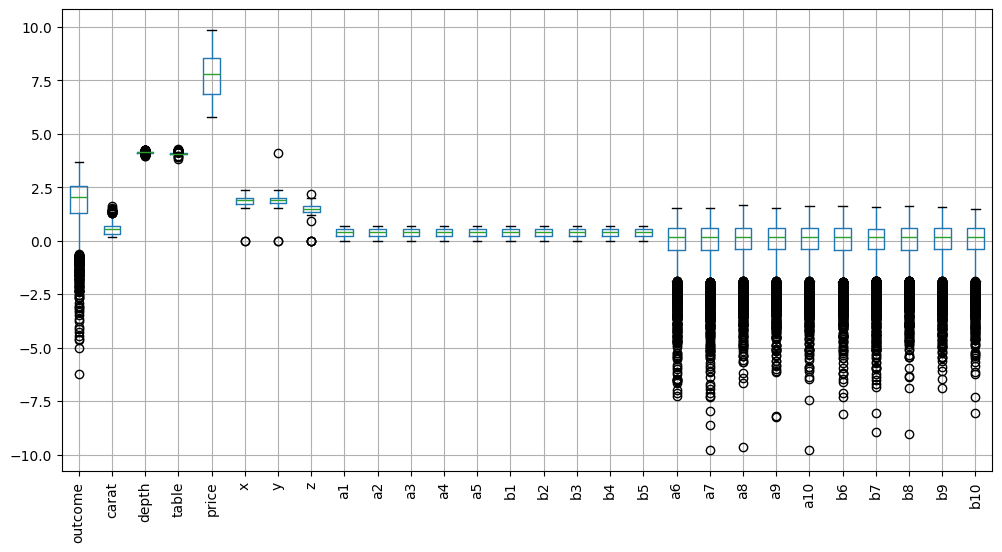

In [10]:
plt.figure(figsize=(12,6))
df_scaled.boxplot()
plt.xticks(rotation=90)
plt.show()

There seems to be a concentration of low-level outliers for several features including 'outcome' - we will not remove any of these for now.

Correlation analysis to identify features that are highly correlated with the target outcome

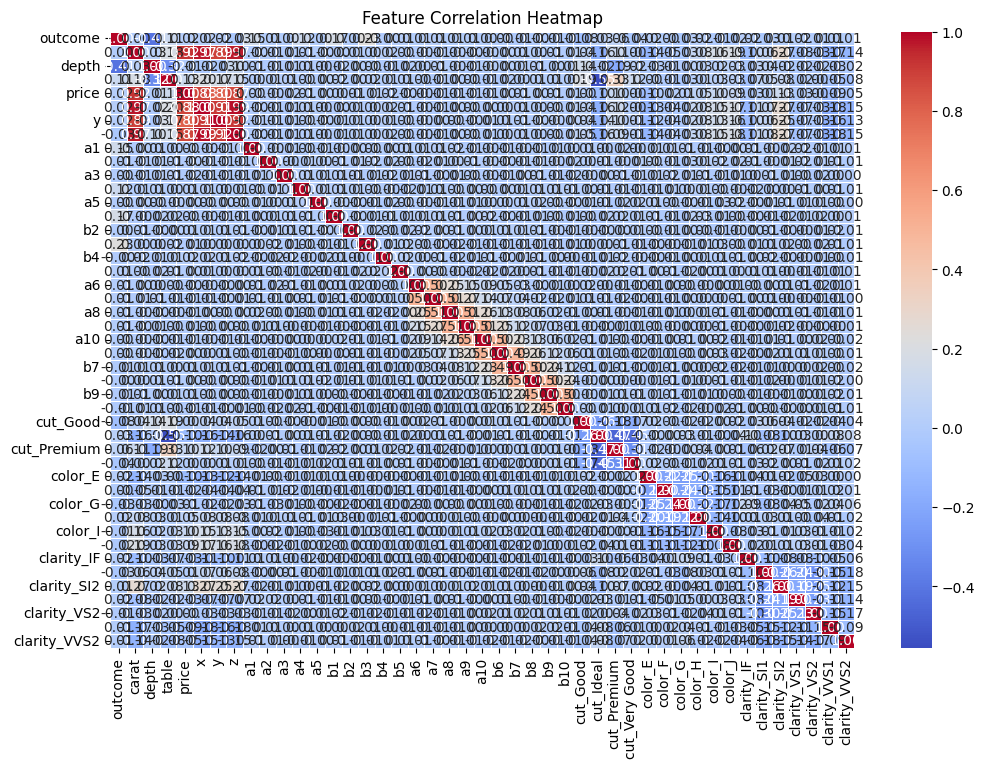

In [11]:
import seaborn as sns

# Identify categorical columns
cat_features = df.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Feature importance for random forest

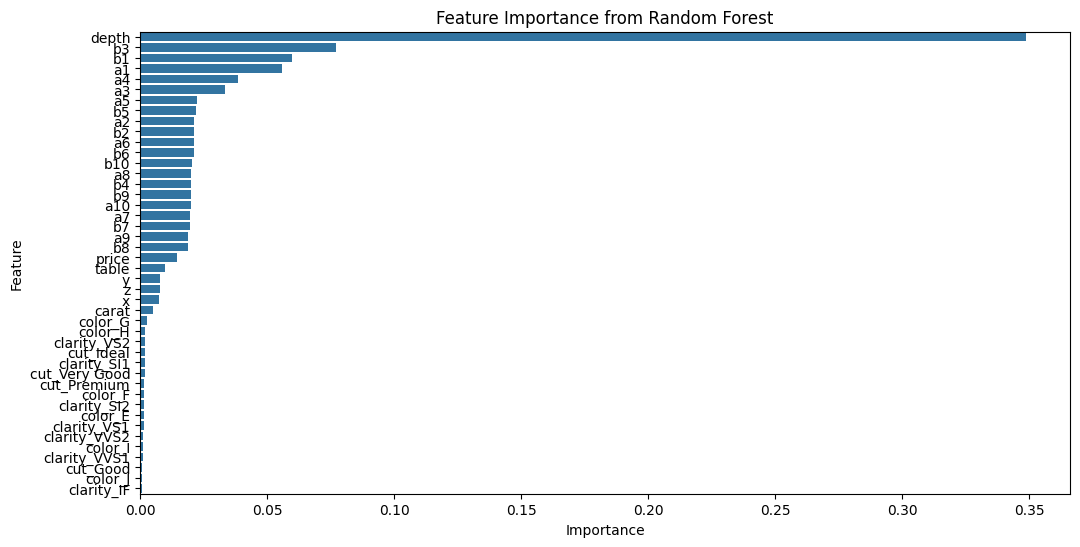

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model on all features
X = df.drop(columns=["outcome"])  # Drop target
y = df["outcome"]
rf.fit(X, y)

# Get feature importance
importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
importance = importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=importance)
plt.title("Feature Importance from Random Forest")
plt.show()

Mutual information

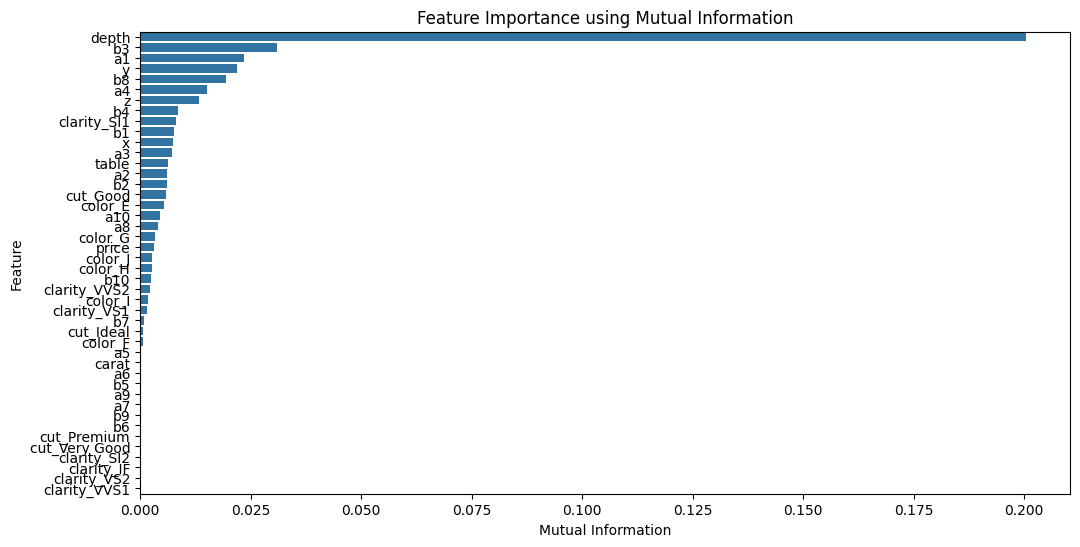

In [13]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X, y)

# Store results in DataFrame
mi_scores = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi})
mi_scores = mi_scores.sort_values(by="Mutual Information", ascending=False)

# Plot MI scores
plt.figure(figsize=(12,6))
sns.barplot(x="Mutual Information", y="Feature", data=mi_scores)
plt.title("Feature Importance using Mutual Information")
plt.show()